In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# load the pca
brc = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\beta\bray-curtis_pca.tsv", sep='\t', skiprows=2)
brc.set_index('#SampleID', inplace=True)
jac = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\beta\jaccard_pca.tsv", sep='\t', skiprows=2)
jac.set_index('#SampleID', inplace=True)
ufrac = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\beta\unweighted_unifrac_pca.tsv", sep='\t', skiprows=2)
ufrac.set_index('#SampleID', inplace=True)
wfrac = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\beta\weighted_unifrac_pca.tsv", sep='\t', skiprows=2)
wfrac.set_index('#SampleID', inplace=True)

In [3]:
# load metadata
metadata = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\inputs\metadata_swabs.tsv", sep='\t')
metadata = metadata.iloc[1:]
metadata.set_index('#SampleID', inplace=True)
metadata

,Label,Plate,Position,BarcodeSequence,LinkerPrimerSequence,ForwardBarcodeSequence,ReversePrimerSequence,ReverseBarcodeSequence,TruSeqAdapter,Patient,...,Patient_Visit_SS_SAE,Patient_Visit_AllTogether_SAE_place,Patient_Visit_SAE_place,Patient_Visit_AllTogether_SAE_Eco,Patient_Visit_SAE_Eco,Dg_RS3,Dg_Drug_RS3,Dg_SAE_RS3,Dg_SS_SAE_RS3,Dg_SSEco_SAE_RS3
#SampleID,,,,,,,,,,,,,,,,,,,,,
P3_PK97_I_C,IS_P3_PK97_I_C,plate_1,A1,AAAGCACCTTCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACCTTCC,ACAGTG,P3,...,P3_visit_1_C_no,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,CD_Part,CD_ADA_Part,CD_no_Part,CD_C_no_Part,CD_SeS_no_Part
P3_PK97_I_E,IS_P3_PK97_I_E,plate_1,B1,AAAGCAGCCACCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,AGCCACC,ACAGTG,P3,...,P3_visit_1_E_no,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,CD_Part,CD_ADA_Part,CD_no_Part,CD_E_no_Part,CD_Mo_no_Part
P3_PK97_II_C,IS_P3_PK97_II_C,plate_1,C1,AAAGCAACAGCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,AACAGCC,ACAGTG,P3,...,P3_visit_2_C_yes,P3_visit_2_C,P3_visit_2_C,P3_visit_2_SeS,P3_visit_2_SeS,CD_Part,CD_ADA_Part,CD_yes_Part,CD_C_yes_Part,CD_SeS_yes_Part
P3_PK97_II_E,IS_P3_PK97_II_E,plate_1,D1,AAAGCACGGCCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACGGCCC,ACAGTG,P3,...,P3_visit_2_E_yes,P3_visit_2_E,P3_visit_2_E,P3_visit_2_Mo,P3_visit_2_Mo,CD_Part,CD_ADA_Part,CD_yes_Part,CD_E_yes_Part,CD_Mo_yes_Part
P3_PK97_III_C,IS_P3_PK97_III_C,plate_1,E1,AAAGCACTGGCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACTGGCC,ACAGTG,P3,...,P3_visit_3_C_yes,P3_visit_3_C,P3_visit_3_C,P3_visit_3_SeS,P3_visit_3_SeS,CD_Part,CD_ADA_Part,CD_yes_Part,CD_C_yes_Part,CD_SeS_yes_Part
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K41_NE90_IV_D,K41_NE90_IV_D,plate_4,D12,AGGGTAGTGCGCA,GTCCTACGGGNGGCWGCAG,AGGGT,GGACTACHVGGGTWTCTAAT,AGTGCGC,GTGAAA,HC41,...,HC41_visit_4HC_D_HC,HC41_visit_4HC_HC,HC41_visit_4HC_HC,HC41_visit_4HC_HC,HC41_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC
K43_KZ94_I_C,K43_KZ94_I_C,plate_4,E12,AGGGTAGACTCTA,GTCCTACGGGNGGCWGCAG,AGGGT,GGACTACHVGGGTWTCTAAT,AGACTCT,GTGAAA,HC43,...,HC43_visit_1HC_C_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_C_HC_HC,HC_SeS_HC_HC
K43_KZ94_I_D,K43_KZ94_I_D,plate_4,F12,AGGGTAGGGGTTA,GTCCTACGGGNGGCWGCAG,AGGGT,GGACTACHVGGGTWTCTAAT,AGGGGTT,GTGAAA,HC43,...,HC43_visit_1HC_D_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC43_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC


In [4]:
# merge pca with metadata
brc = brc.merge(metadata, how='inner', left_index=True, right_index=True)
jac = jac.merge(metadata, how='inner', left_index=True, right_index=True)
ufrac = ufrac.merge(metadata, how='inner', left_index=True, right_index=True)
wfrac = wfrac.merge(metadata, how='inner', left_index=True, right_index=True)

In [5]:
# load shannon diversity values
shannon = pd.read_csv(r"C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\alpha\shannon_tabulated.tsv", sep='\t')
shannon = shannon.iloc[1:]
shannon.set_index('SampleID', inplace=True)
shannon

,shannon_entropy
SampleID,
P2_ZM87_I_D,4.20127655507479
P2_ZM87_II_D,3.85920779109014
P2_ZM87_III_D,3.8111838506234
P2_ZM87_IV_D,5.06685588964312
P2_ZM87_V_D,5.41999989372795
...,...
K39_DS96_I_D,3.22756806151786
K40_WV86_IV_D,5.00190041401175
K41_NE90_I_D,5.41149115863893


In [6]:
# merge shannon with metadata
brc = brc.merge(shannon, how='inner', left_index=True, right_index=True)
jac = jac.merge(shannon, how='inner', left_index=True, right_index=True)
ufrac = ufrac.merge(shannon, how='inner', left_index=True, right_index=True)
wfrac = wfrac.merge(shannon, how='inner', left_index=True, right_index=True)

### Show cluster centroids on PCA

In [7]:
# modify df to load into centroid function
brc['PC1_PC2'] = brc[['PC1', 'PC2']].apply(tuple, axis=1)
jac['PC1_PC2'] = jac[['PC1', 'PC2']].apply(tuple, axis=1)
ufrac['PC1_PC2'] = ufrac[['PC1', 'PC2']].apply(tuple, axis=1)
wfrac['PC1_PC2'] = wfrac[['PC1', 'PC2']].apply(tuple, axis=1)

hc_brc = brc[brc["Dg"]=="HC"]
hc_jac = jac[jac["Dg"]=="HC"]
hc_ufrac = ufrac[ufrac["Dg"]=="HC"]
hc_wfrac = wfrac[wfrac["Dg"]=="HC"]

ibd_brc = brc[(brc['Health_status']=='patient')]
ibd_jac = jac[(jac['Health_status']=='patient')]
ibd_ufrac = ufrac[(ufrac['Health_status']=='patient')]
ibd_wfrac = wfrac[(wfrac['Health_status']=='patient')]


In [8]:
convert_dict = {'Week_num': float,
                'HBI_num': float,
                'pMayo_num': float,
                'shannon_entropy': float
               }
brc = brc.astype(convert_dict)
jac = jac.astype(convert_dict)
ufrac = ufrac.astype(convert_dict)
wfrac = wfrac.astype(convert_dict)

In [9]:
### CENTROID ###
def centroid(points: list):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

In [10]:
tuples_hc_brc = []
for i in hc_brc['PC1_PC2']:
    tuples_hc_brc.append(i)

tuples_ibd_brc = []
for i in ibd_brc['PC1_PC2']:
    tuples_ibd_brc.append(i)

tuples_hc_jac = []
for i in hc_jac['PC1_PC2']:
    tuples_hc_jac.append(i)

tuples_ibd_jac = []
for i in ibd_jac['PC1_PC2']:
    tuples_ibd_jac.append(i)

tuples_hc_ufrac = []
for i in hc_ufrac['PC1_PC2']:
    tuples_hc_ufrac.append(i)

tuples_ibd_ufrac = []
for i in ibd_ufrac['PC1_PC2']:
    tuples_ibd_ufrac.append(i)

tuples_hc_wfrac = []
for i in hc_wfrac['PC1_PC2']:
    tuples_hc_wfrac.append(i)

tuples_ibd_wfrac = []
for i in ibd_wfrac['PC1_PC2']:
    tuples_ibd_wfrac.append(i)

In [11]:
centroid(tuples_hc_brc)

[-0.21838241863154584, 0.017204979812097905]

In [12]:
centroid(tuples_ibd_brc)

[0.16378681397365946, -0.012903734859073545]

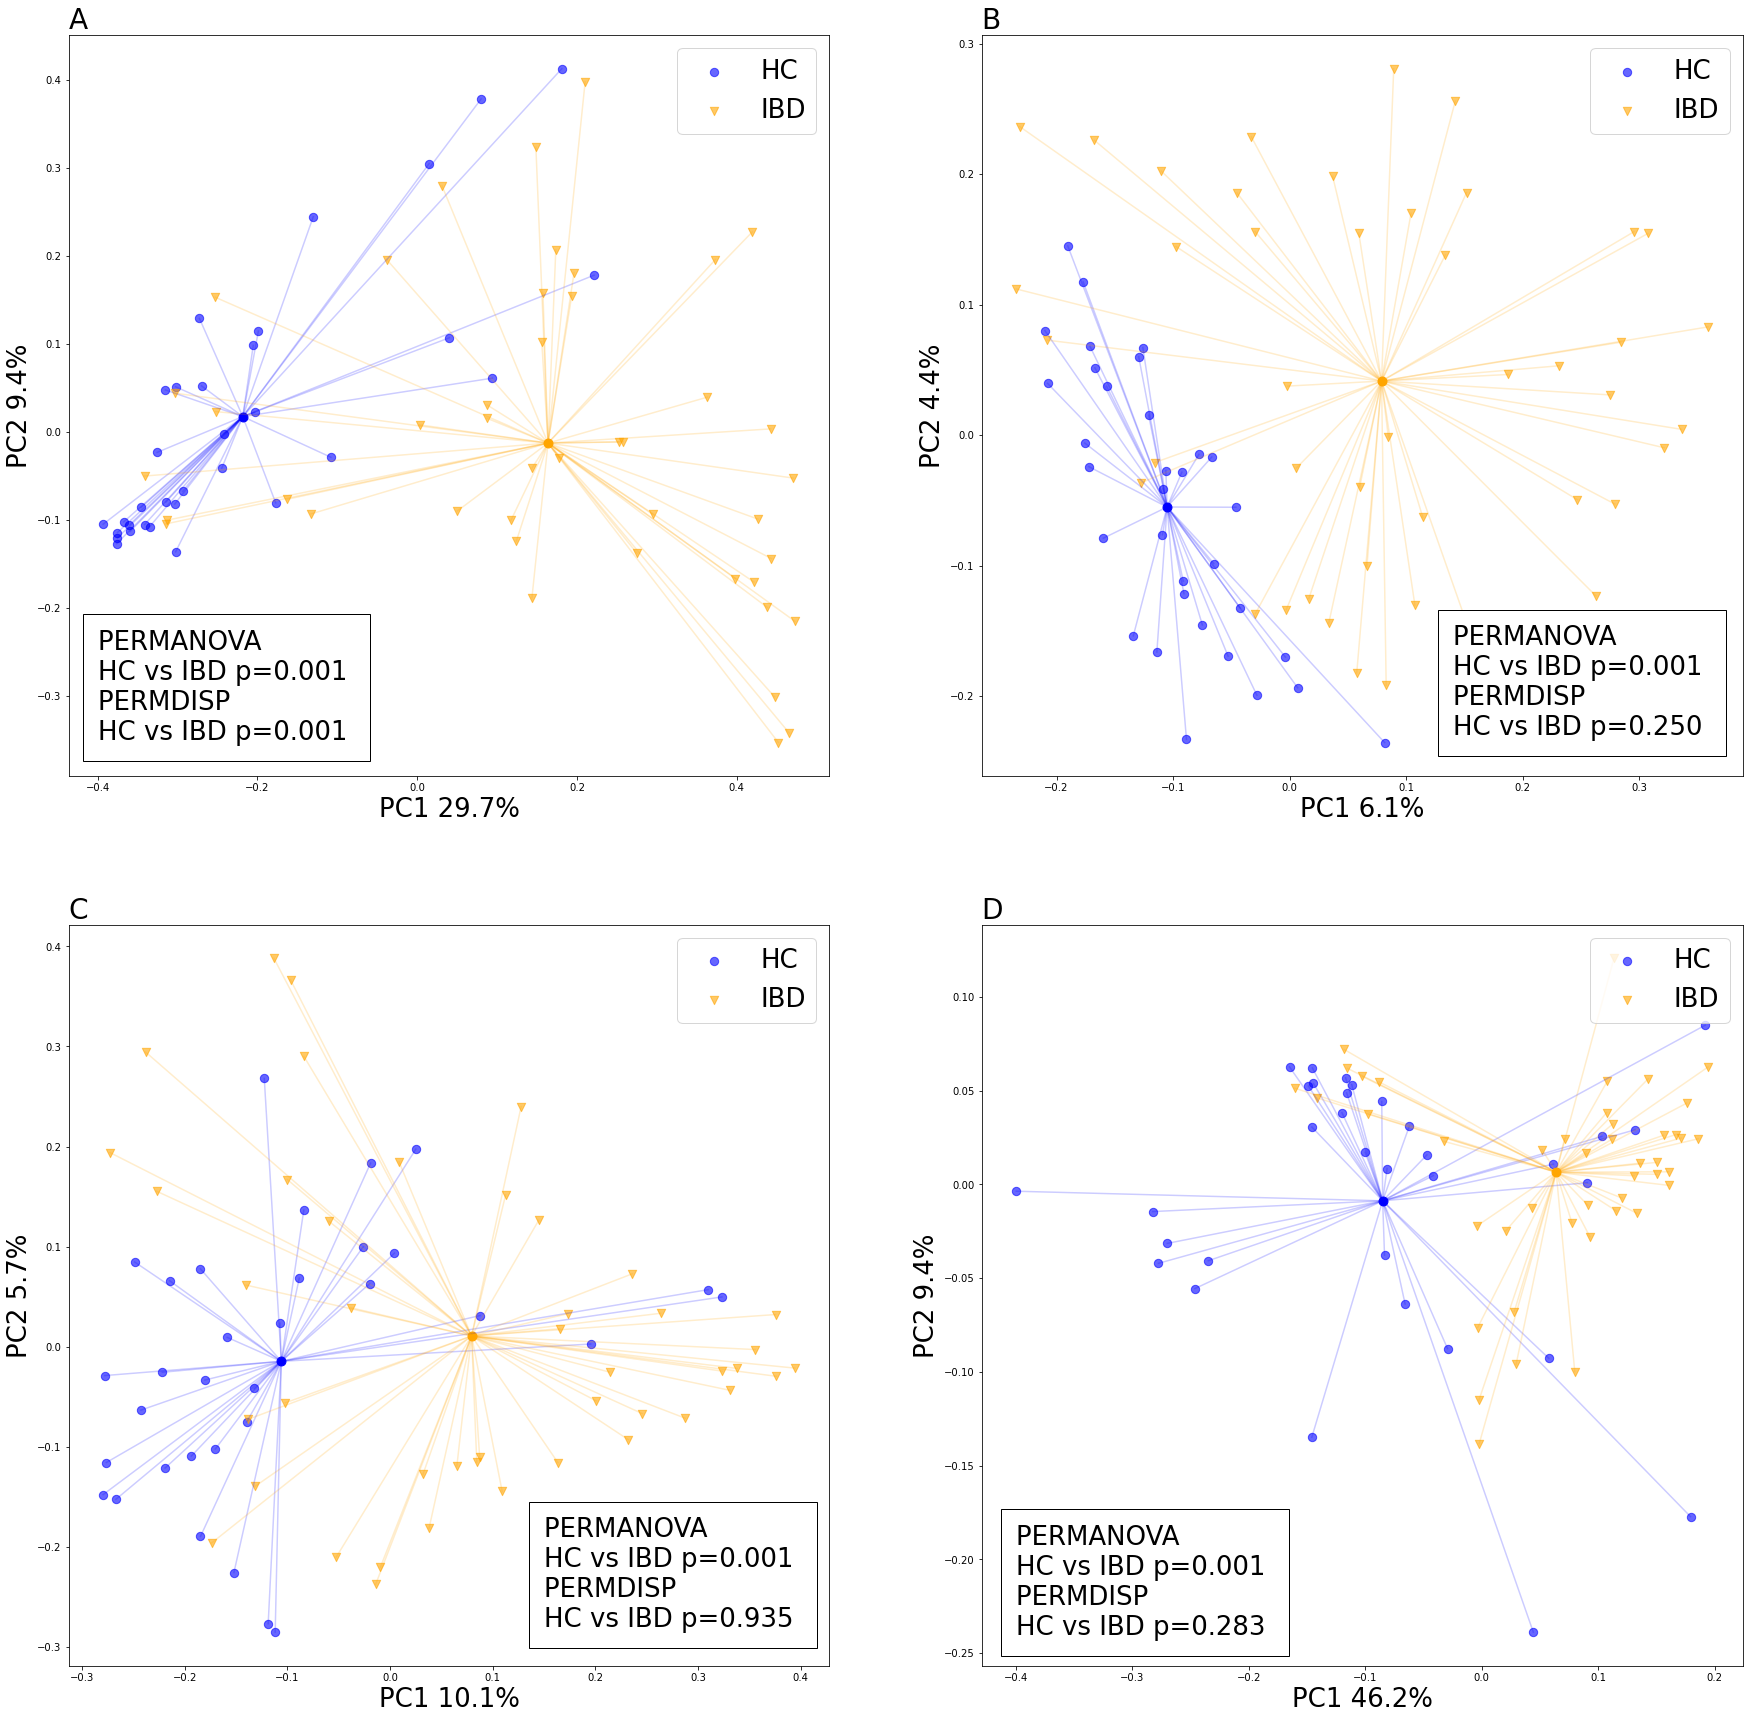

In [14]:
f1, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(30, 30))

## Bray-Curtis ##
# scatterplot
ax1.scatter(hc_brc.PC1, hc_brc.PC2, alpha = 0.6, c='blue', label='HC', s=70)
ax1.scatter(ibd_brc.PC1, ibd_brc.PC2, alpha = 0.6, c='orange', label='IBD', s=70, marker='v')

# add centroids
ax1.scatter(centroid(tuples_hc_brc)[0], centroid(tuples_hc_brc)[1], color='blue', s=80)
ax1.scatter(centroid(tuples_ibd_brc)[0], centroid(tuples_ibd_brc)[1], color='orange', s=80)

# plot centroid lines
for idx, val in hc_brc.iterrows():
    x = [val.PC1, centroid(tuples_hc_brc)[0],]
    y = [val.PC2, centroid(tuples_hc_brc)[1]]
    ax1.plot(x, y, color='blue', alpha=0.2)

for idx, val in ibd_brc.iterrows():
    x = [val.PC1, centroid(tuples_ibd_brc)[0],]
    y = [val.PC2, centroid(tuples_ibd_brc)[1]]
    ax1.plot(x, y, color='orange', alpha=0.2)

    
## Jaccard ##
# scatterplot #
ax2.scatter(hc_jac.PC1, hc_jac.PC2, alpha = 0.6, c='blue', label='HC', s=70)
ax2.scatter(ibd_jac.PC1, ibd_jac.PC2, alpha = 0.6, c='orange', label='IBD', s=70, marker='v')

# add centroids
ax2.scatter(centroid(tuples_hc_jac)[0], centroid(tuples_hc_jac)[1], color='blue', s=80)
ax2.scatter(centroid(tuples_ibd_jac)[0], centroid(tuples_ibd_jac)[1], color='orange', s=80)

# plot centroid lines
for idx, val in hc_jac.iterrows():
    x = [val.PC1, centroid(tuples_hc_jac)[0],]
    y = [val.PC2, centroid(tuples_hc_jac)[1]]
    ax2.plot(x, y, color='blue', alpha=0.2)

for idx, val in ibd_jac.iterrows():
    x = [val.PC1, centroid(tuples_ibd_jac)[0],]
    y = [val.PC2, centroid(tuples_ibd_jac)[1]]
    ax2.plot(x, y, color='orange', alpha=0.2)

    
## Unweighted UniFrac ##
# scatterplot #
ax3.scatter(hc_ufrac.PC1, hc_ufrac.PC2, alpha = 0.6, c='blue', label='HC', s=70)
ax3.scatter(ibd_ufrac.PC1, ibd_ufrac.PC2, alpha = 0.6, c='orange', label='IBD', s=70, marker='v')

# add centroids
ax3.scatter(centroid(tuples_hc_ufrac)[0], centroid(tuples_hc_ufrac)[1], color='blue', s=80)
ax3.scatter(centroid(tuples_ibd_ufrac)[0], centroid(tuples_ibd_ufrac)[1], color='orange', s=80)

# plot centroid lines
for idx, val in hc_ufrac.iterrows():
    x = [val.PC1, centroid(tuples_hc_ufrac)[0],]
    y = [val.PC2, centroid(tuples_hc_ufrac)[1]]
    ax3.plot(x, y, color='blue', alpha=0.2)

for idx, val in ibd_ufrac.iterrows():
    x = [val.PC1, centroid(tuples_ibd_ufrac)[0],]
    y = [val.PC2, centroid(tuples_ibd_ufrac)[1]]
    ax3.plot(x, y, color='orange', alpha=0.2)

    
## Weighted UniFrac ##
# scatterplot #
ax4.scatter(hc_wfrac.PC1, hc_wfrac.PC2, alpha = 0.6, c='blue', label='HC', s=70)
ax4.scatter(ibd_wfrac.PC1, ibd_wfrac.PC2, alpha = 0.6, c='orange', label='IBD', s=70, marker='v')

# add centroids
ax4.scatter(centroid(tuples_hc_wfrac)[0], centroid(tuples_hc_wfrac)[1], color='blue', s=80)
ax4.scatter(centroid(tuples_ibd_wfrac)[0], centroid(tuples_ibd_wfrac)[1], color='orange', s=80)

# plot centroid lines
for idx, val in hc_wfrac.iterrows():
    x = [val.PC1, centroid(tuples_hc_wfrac)[0],]
    y = [val.PC2, centroid(tuples_hc_wfrac)[1]]
    ax4.plot(x, y, color='blue', alpha=0.2)

for idx, val in ibd_wfrac.iterrows():
    x = [val.PC1, centroid(tuples_ibd_wfrac)[0],]
    y = [val.PC2, centroid(tuples_ibd_wfrac)[1]]
    ax4.plot(x, y, color='orange', alpha=0.2)



# labels and legend
ax1.set_xlabel('PC1 29.7%', fontsize=26)
ax1.set_ylabel('PC2 9.4%', fontsize=26)
ax1.legend(loc=1, prop={'size': 26})
ax1.set_title("A", fontsize=28, loc='left')
ax1.text(-0.40, -0.35, 'PERMANOVA \nHC vs IBD p=0.001 \nPERMDISP \nHC vs IBD p=0.001', bbox={'facecolor': 'white', 'pad': 15}, fontsize=26)

ax2.set_xlabel('PC1 6.1%', fontsize=26)
ax2.set_ylabel('PC2 4.4%', fontsize=26)
ax2.legend(loc=1, prop={'size': 26})
ax2.set_title("B", fontsize=28, loc='left')
ax2.text(0.14, -0.23, 'PERMANOVA \nHC vs IBD p=0.001 \nPERMDISP \nHC vs IBD p=0.250', bbox={'facecolor': 'white', 'pad': 15}, fontsize=26)

ax3.set_xlabel('PC1 10.1%', fontsize=26)
ax3.set_ylabel('PC2 5.7%', fontsize=26)
ax3.legend(loc=1, prop={'size': 26})
ax3.set_title("C", fontsize=28, loc='left')
ax3.text(0.15, -0.28, 'PERMANOVA \nHC vs IBD p=0.001 \nPERMDISP \nHC vs IBD p=0.935', bbox={'facecolor': 'white', 'pad': 15}, fontsize=26)

ax4.set_xlabel('PC1 46.2%', fontsize=26)
ax4.set_ylabel('PC2 9.4%', fontsize=26)
ax4.legend(loc=1, prop={'size': 26})
ax4.set_title("D", fontsize=28, loc='left')
ax4.text(-0.4, -0.24, 'PERMANOVA \nHC vs IBD p=0.001 \nPERMDISP \nHC vs IBD p=0.283', bbox={'facecolor': 'white', 'pad': 15}, fontsize=26)

# save figure
f1.savefig(r'C:\Users\Dasa\Documents\MEGA\MBÚ\swabs_ZS\outputs\qiime2_results_290230\diveristy-D_UST\PCoA-Health_status.png')